# **Data Quest Round 2 - Bank Data - User Default Probability Prediction**


In [7]:
import os
print(os.getcwd())  # This prints your current working directory


C:\Users\jaanh\Notebooks


In [39]:
import pandas as pd
path = "dataquest/cleaned_train_data.csv"
df = pd.read_csv(path)

In [41]:
df.head()

,onus_attribute_26,transaction_attribute_431,onus_attribute_2,transaction_attribute_464,onus_attribute_29,transaction_attribute_429,bureau_140,transaction_attribute_410,bureau_73,onus_attribute_31,...,transaction_attribute_371,bureau_277,bureau_21,transaction_attribute_514,transaction_attribute_167,bureau_enquiry_1,transaction_attribute_52,bureau_327,bureau_enquiry_22,bad_flag
0,0,0.0,0.101800,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,1.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0
1,0,0.0,0.308298,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,12.0,0.084167,0.00,2.0,908.600006,0.0,3.0,0
2,1,0.0,0.053721,0.0,0,0.0,0.0,0.0,3.0,0,...,0.0,0.0,10.0,0.000000,0.00,0.0,0.000000,0.0,1.0,0
3,0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0
4,1,0.0,0.920366,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,1.0,5.0,0.000000,0.25,1.0,0.000000,0.0,0.0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77444 entries, 0 to 77443
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   onus_attribute_26          77444 non-null  int64  
 1   transaction_attribute_431  77444 non-null  float64
 2   onus_attribute_2           77444 non-null  float64
 3   transaction_attribute_464  77444 non-null  float64
 4   onus_attribute_29          77444 non-null  int64  
 5   transaction_attribute_429  77444 non-null  float64
 6   bureau_140                 77444 non-null  float64
 7   transaction_attribute_410  77444 non-null  float64
 8   bureau_73                  77444 non-null  float64
 9   onus_attribute_31          77444 non-null  int64  
 10  transaction_attribute_312  77444 non-null  float64
 11  transaction_attribute_394  77444 non-null  float64
 12  bureau_147                 77444 non-null  float64
 13  transaction_attribute_563  77444 non-null  flo

In [45]:
df.isnull().sum()


onus_attribute_26            0
transaction_attribute_431    0
onus_attribute_2             0
transaction_attribute_464    0
onus_attribute_29            0
transaction_attribute_429    0
bureau_140                   0
transaction_attribute_410    0
bureau_73                    0
onus_attribute_31            0
transaction_attribute_312    0
transaction_attribute_394    0
bureau_147                   0
transaction_attribute_563    0
transaction_attribute_67     0
transaction_attribute_20     0
transaction_attribute_160    0
transaction_attribute_581    0
transaction_attribute_23     0
transaction_attribute_425    0
bureau_452                   0
onus_attribute_18            0
transaction_attribute_161    0
transaction_attribute_257    0
bureau_77                    0
bureau_122                   0
transaction_attribute_218    0
transaction_attribute_174    0
transaction_attribute_43     0
transaction_attribute_287    0
bureau_193                   0
transaction_attribute_318    0
transact

In [29]:
df.dropna(inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77444 entries, 0 to 77443
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   onus_attribute_26          77444 non-null  int64  
 1   transaction_attribute_431  77444 non-null  float64
 2   onus_attribute_2           77444 non-null  float64
 3   transaction_attribute_464  77444 non-null  float64
 4   onus_attribute_29          77444 non-null  int64  
 5   transaction_attribute_429  77444 non-null  float64
 6   bureau_140                 77444 non-null  float64
 7   transaction_attribute_410  77444 non-null  float64
 8   bureau_73                  77444 non-null  float64
 9   onus_attribute_31          77444 non-null  int64  
 10  transaction_attribute_312  77444 non-null  float64
 11  transaction_attribute_394  77444 non-null  float64
 12  bureau_147                 77444 non-null  float64
 13  transaction_attribute_563  77444 non-null  flo

In [52]:
df.head()

,onus_attribute_26,transaction_attribute_431,onus_attribute_2,transaction_attribute_464,onus_attribute_29,transaction_attribute_429,bureau_140,transaction_attribute_410,bureau_73,onus_attribute_31,...,transaction_attribute_371,bureau_277,bureau_21,transaction_attribute_514,transaction_attribute_167,bureau_enquiry_1,transaction_attribute_52,bureau_327,bureau_enquiry_22,bad_flag
0,0,0.0,0.101800,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,1.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0
1,0,0.0,0.308298,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,12.0,0.084167,0.00,2.0,908.600006,0.0,3.0,0
2,1,0.0,0.053721,0.0,0,0.0,0.0,0.0,3.0,0,...,0.0,0.0,10.0,0.000000,0.00,0.0,0.000000,0.0,1.0,0
3,0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0
4,1,0.0,0.920366,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,1.0,5.0,0.000000,0.25,1.0,0.000000,0.0,0.0,0


# *EDA-datset*

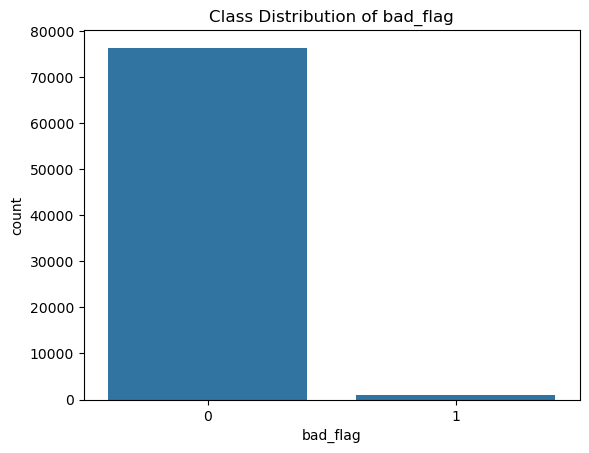

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="bad_flag", data=df)
plt.title("Class Distribution of bad_flag")
plt.show()

In [64]:
bad_count = df[df['bad_flag'] == 1].shape[0]
good_count = df[df['bad_flag'] == 0].shape[0]

print(f"Bad Flag (Defaults): {bad_count}")
print(f"Good Flag (Non-Defaults): {good_count}")

Bad Flag (Defaults): 1102
Good Flag (Non-Defaults): 76342


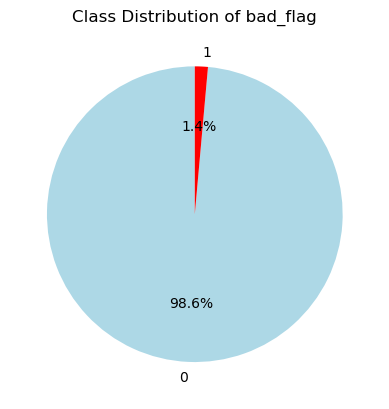

In [56]:
df["bad_flag"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=["lightblue", "red"])
plt.title("Class Distribution of bad_flag")
plt.ylabel("")
plt.show()


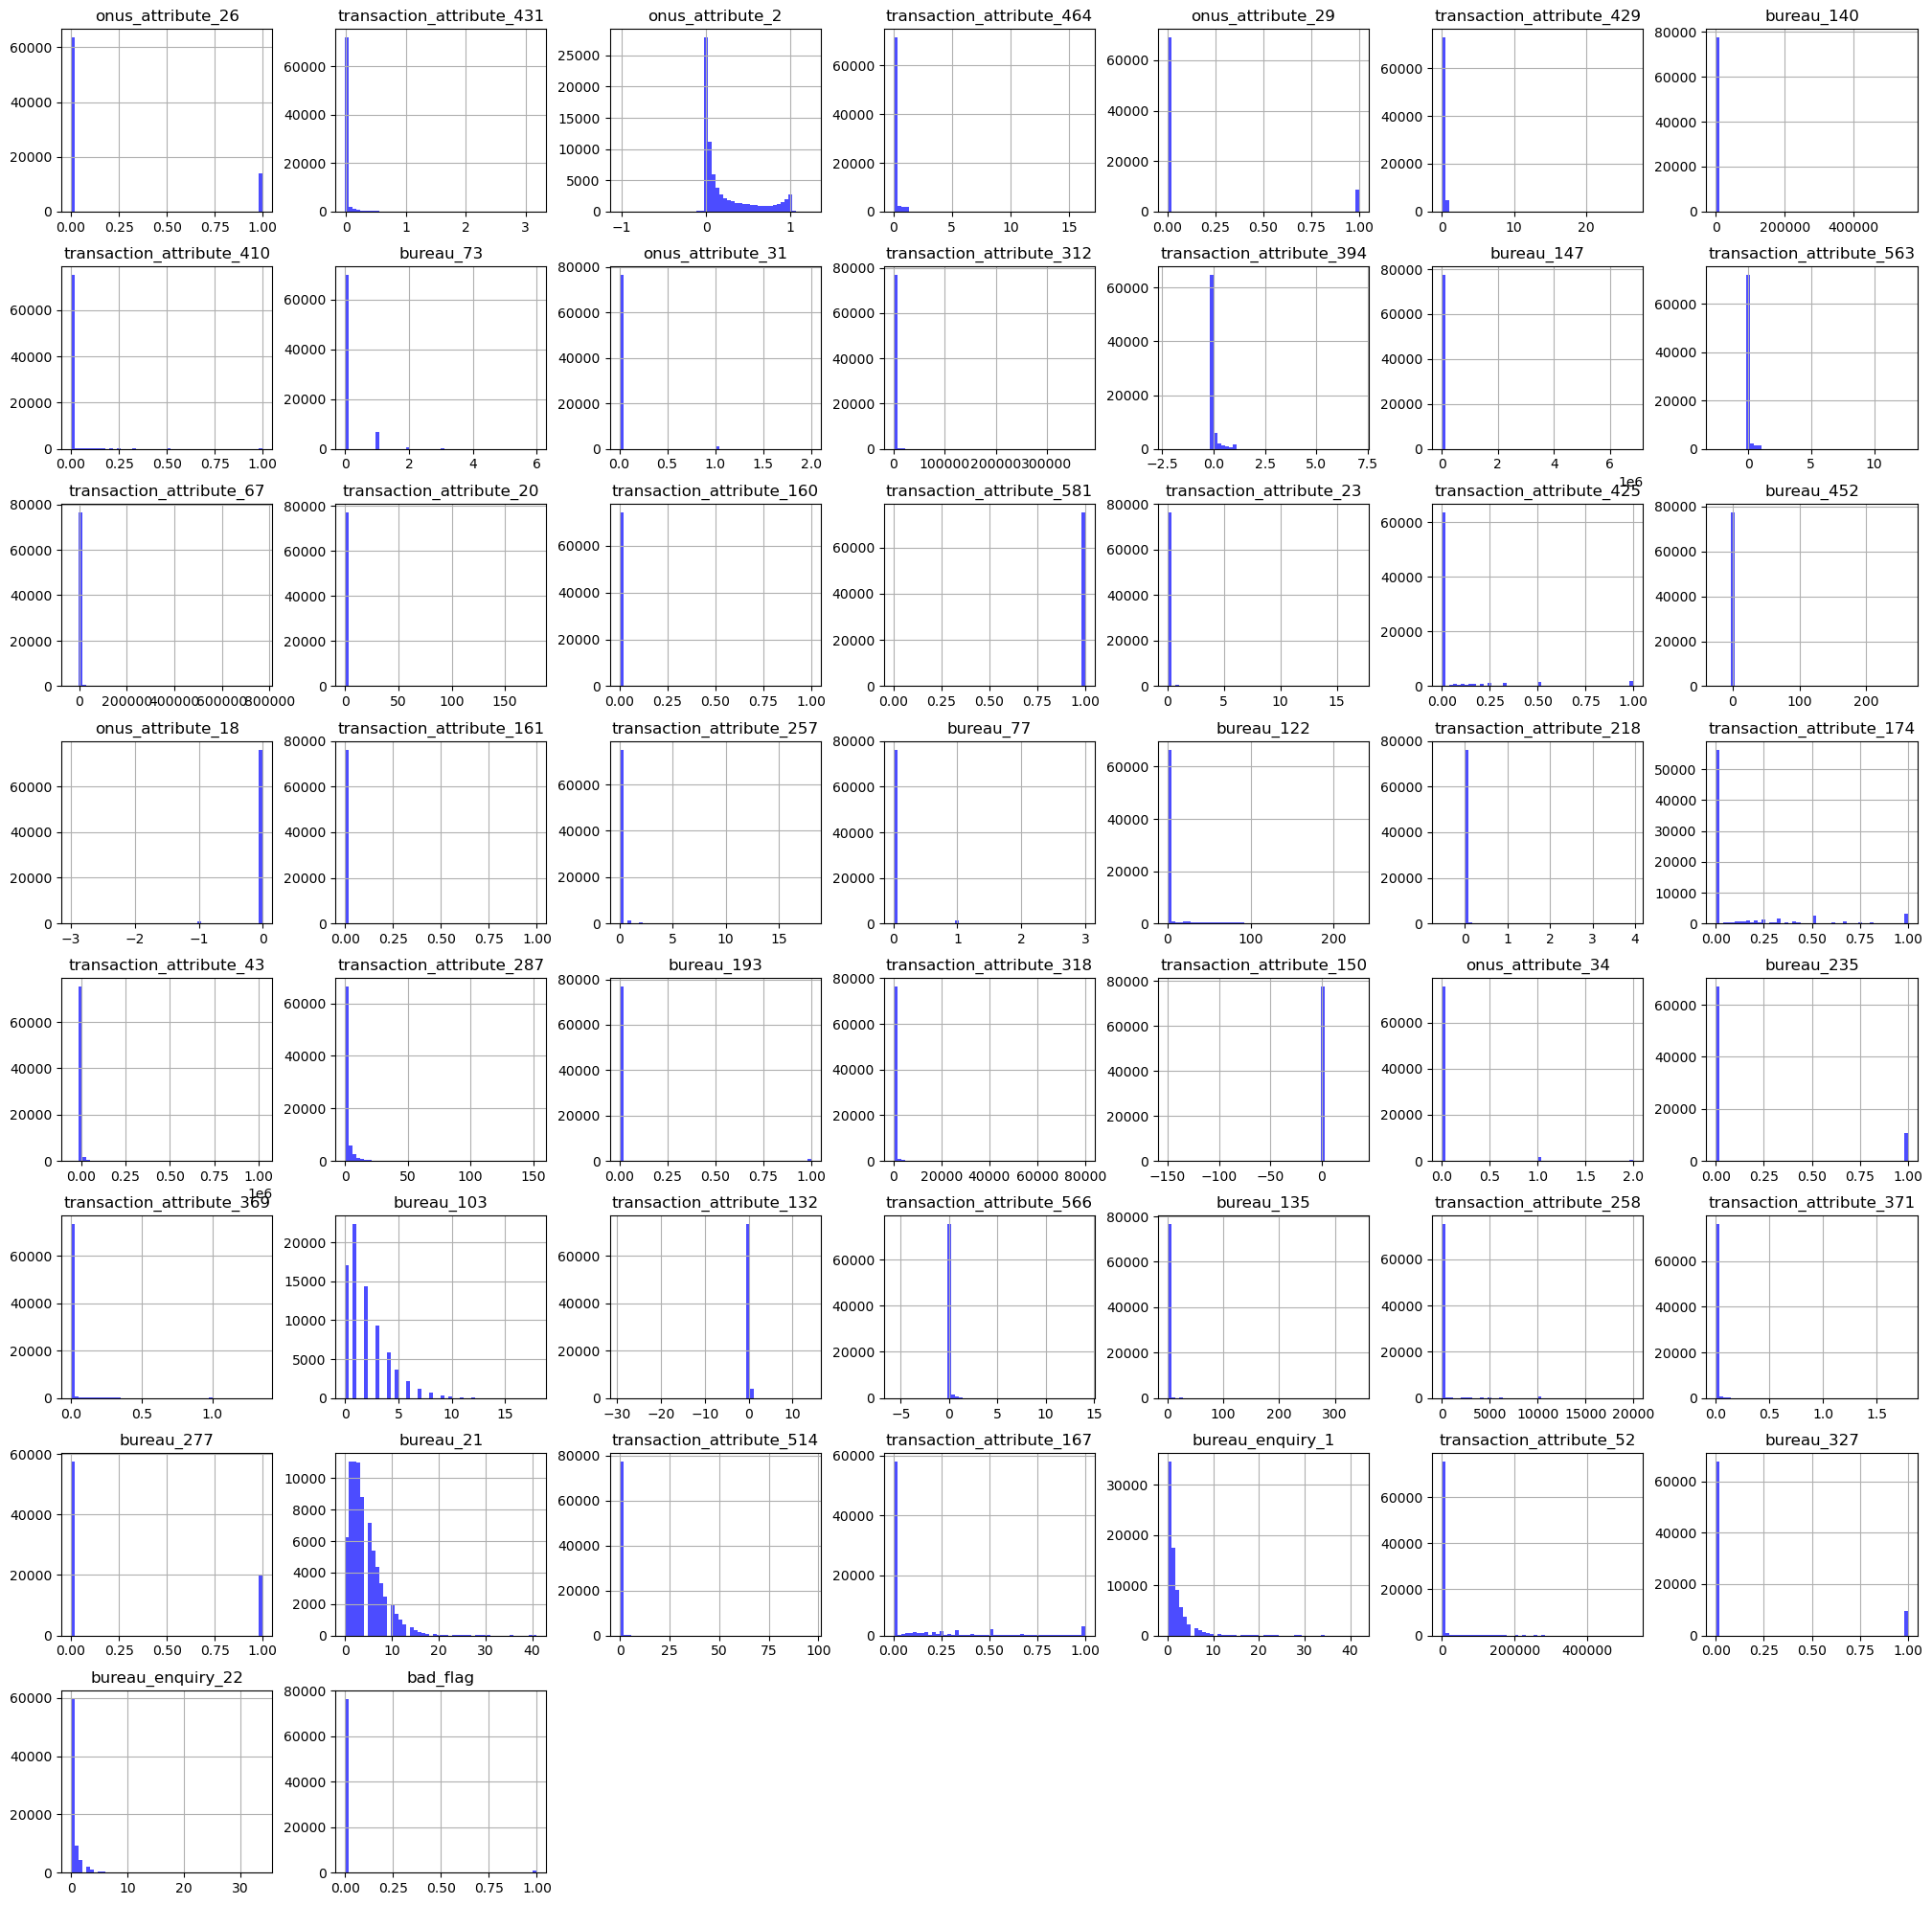

In [70]:
df.hist(figsize=(25,25), bins=50, color="blue", alpha=0.7)
plt.show()


In [62]:
from scipy.stats import zscore
import numpy as np
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)  # Apply z-score
outliers_z = (z_scores.abs() > 3).sum()  # Count values where |Z| > 3
outliers_z[outliers_z > 0].sort_values(ascending=False)  # Show only columns with outliers


transaction_attribute_174    3395
transaction_attribute_464    3186
transaction_attribute_167    3092
bureau_122                   2944
transaction_attribute_394    2830
transaction_attribute_429    2737
transaction_attribute_563    2556
transaction_attribute_425    2443
bureau_enquiry_22            2060
transaction_attribute_132    1951
onus_attribute_34            1944
transaction_attribute_287    1644
transaction_attribute_431    1512
transaction_attribute_258    1465
transaction_attribute_369    1428
bureau_103                   1420
bureau_enquiry_1             1414
transaction_attribute_566    1381
onus_attribute_18            1377
transaction_attribute_160    1374
bureau_77                    1154
bad_flag                     1102
transaction_attribute_23     1102
bureau_21                    1076
transaction_attribute_410    1034
onus_attribute_31             996
transaction_attribute_257     944
transaction_attribute_581     909
bureau_73                     869
transaction_at

# *Smartly-undersampling*

In [68]:
from imblearn.under_sampling import TomekLinks
import pandas as pd

# Load your dataset
df = pd.read_csv("dataquest/cleaned_train_data.csv")

# Separate features and target variable
X = df.drop(columns=["bad_flag"])  # Drop the target column
y = df["bad_flag"]  # Target column

# Apply Tomek Links
tomek = TomekLinks(sampling_strategy="majority")  # Remove majority class Tomek links
X_resampled, y_resampled = tomek.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["bad_flag"] = y_resampled

# Check new class distribution
print(df_resampled["bad_flag"].value_counts())


bad_flag
0    75875
1     1102
Name: count, dtype: int64


In [88]:
defaults = df[df['bad_flag'] == 1]
data= df[df['bad_flag'] == 0]

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\157473758.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\157473758.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


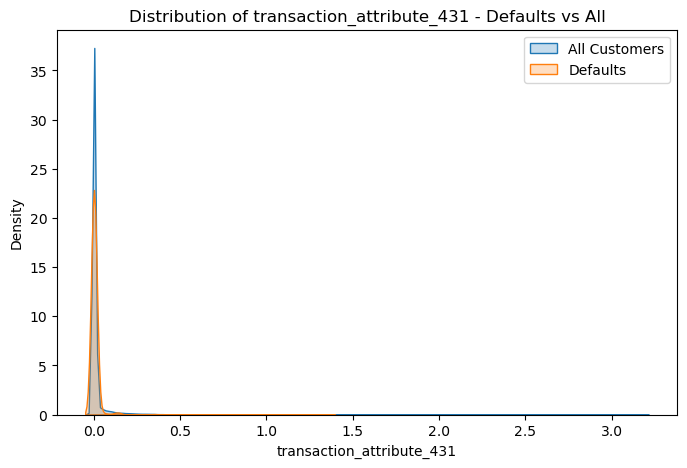

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\157473758.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\157473758.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


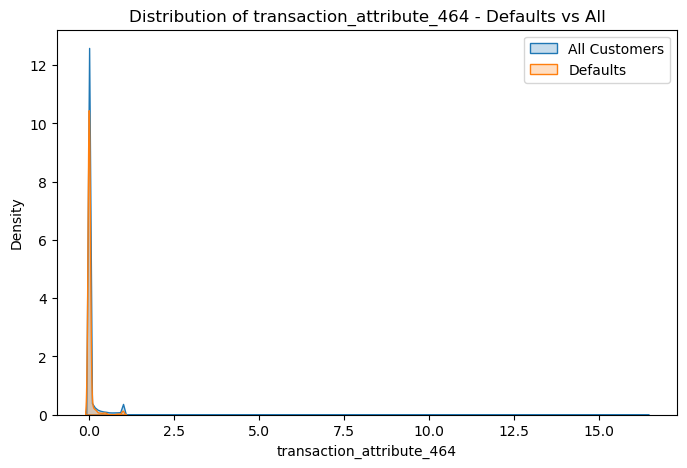

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\157473758.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\157473758.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


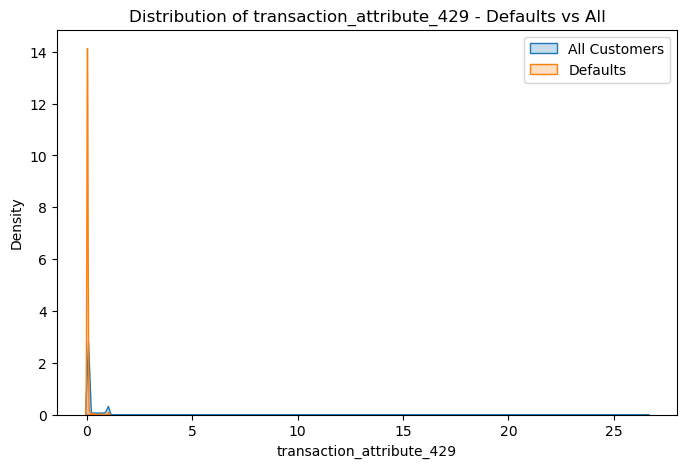

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\157473758.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], label='All Customers', shade=True)


In [ ]:
import seaborn as sns  
import matplotlib.pyplot as plt  
# Filter transaction attribute columns
transaction_cols = [col for col in df.columns if col.startswith('transaction_attribute_')]

# Plot each attribute
for col in transaction_cols:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data[col], label='All Customers', shade=True)  
    sns.kdeplot(defaults[col], label='Defaults', shade=True)  
    plt.legend()
    plt.title(f"Distribution of {col} - Defaults vs All")
    plt.show()

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


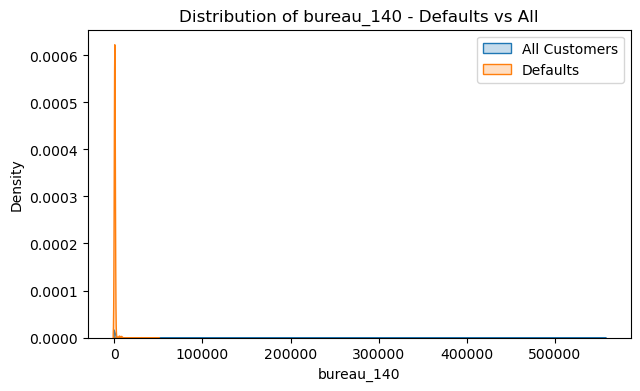

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


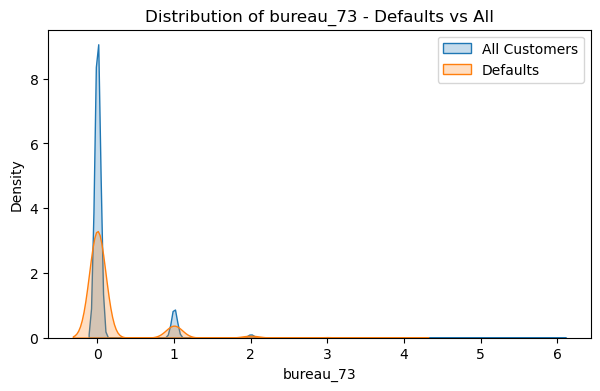

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


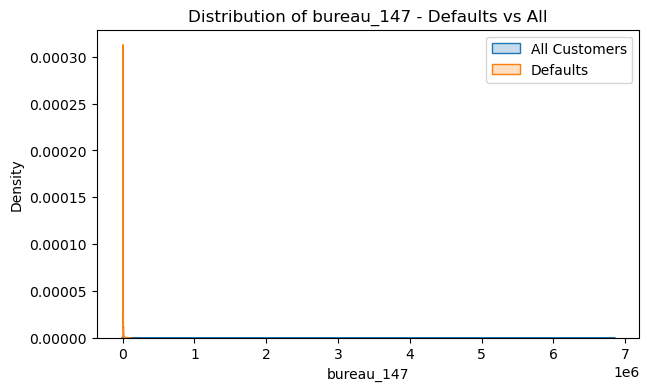

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


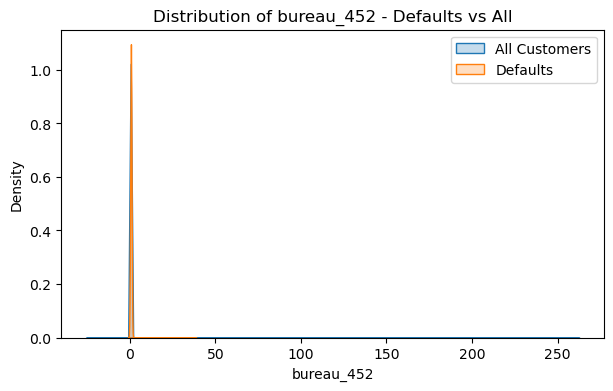

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


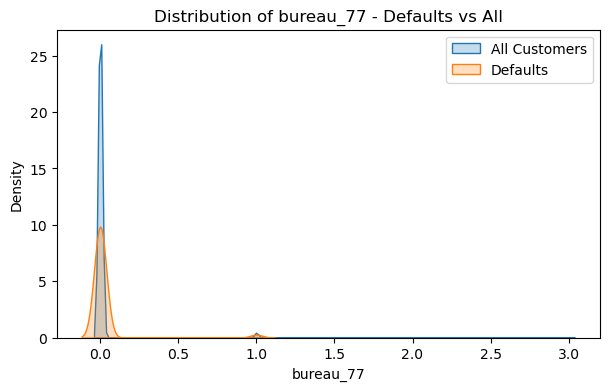

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


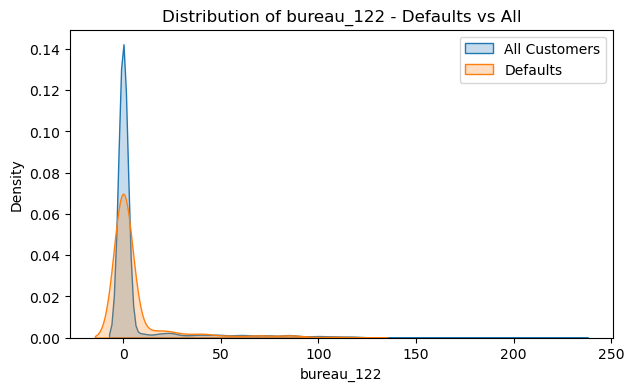

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


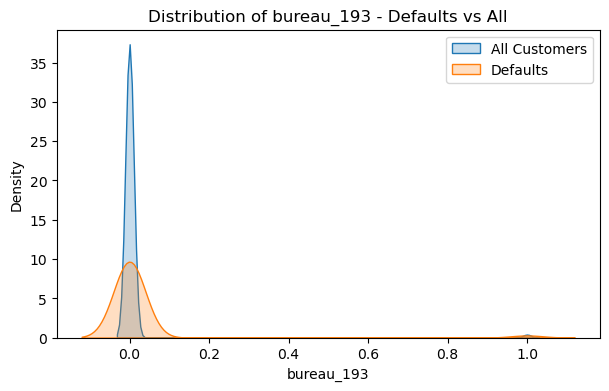

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


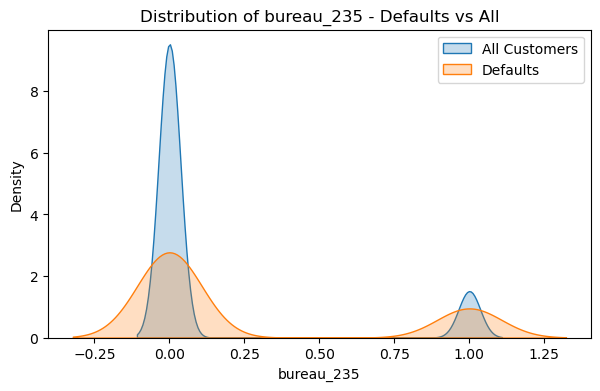

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


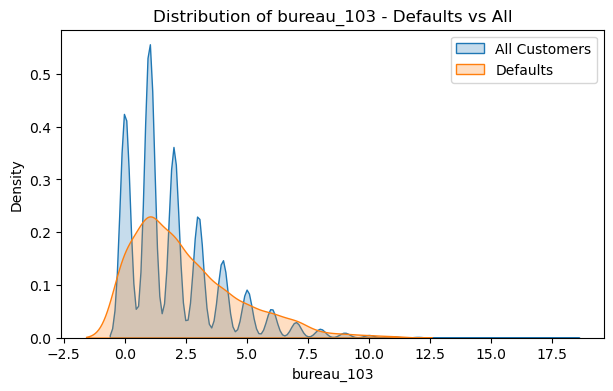

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


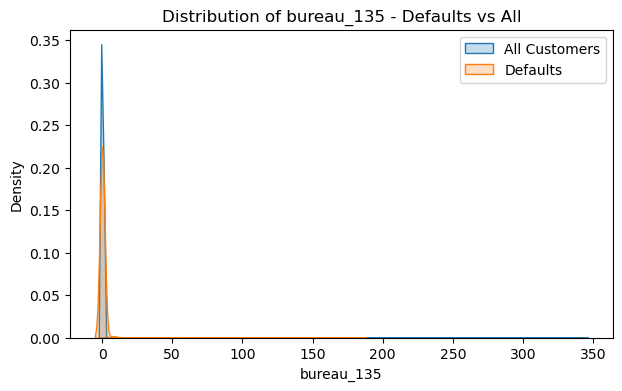

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


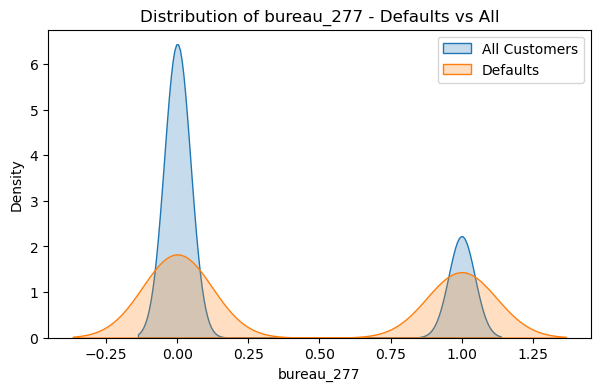

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


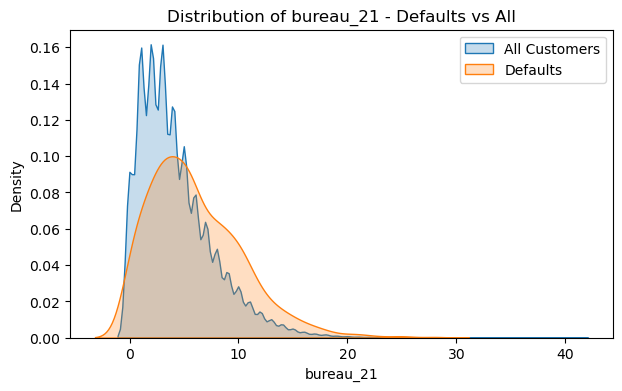

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


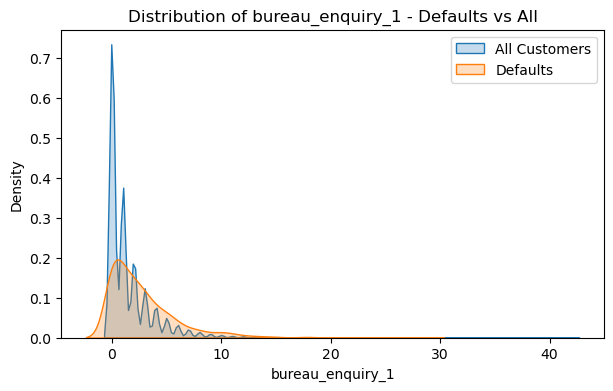

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


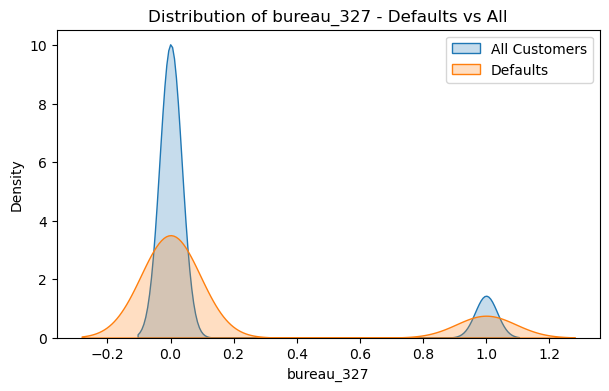

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\1001547508.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


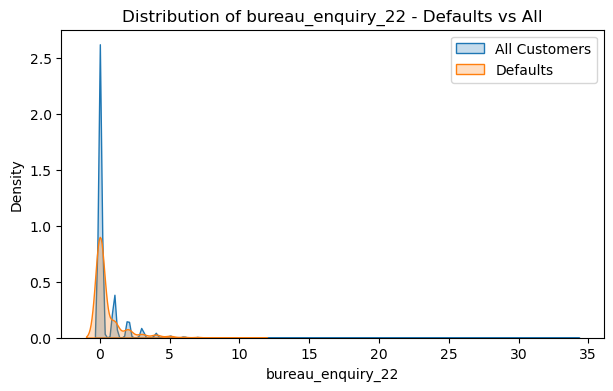

In [86]:
import seaborn as sns  
import matplotlib.pyplot as plt  
# Filter transaction attribute columns
transaction_cols = [col for col in df.columns if col.startswith('bureau_')]

# Plot each attribute
for col in transaction_cols:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(df[col], label='All Customers', shade=True)  
    sns.kdeplot(defaults[col], label='Defaults', shade=True)  
    plt.legend()
    plt.title(f"Distribution of {col} - Defaults vs All")
    plt.show()

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


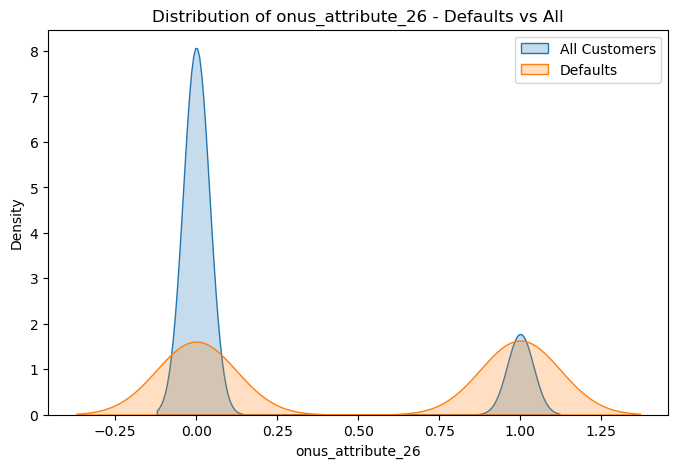

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


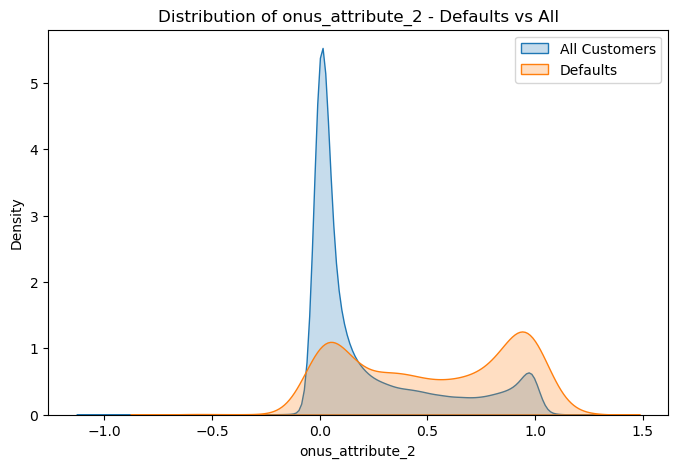

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


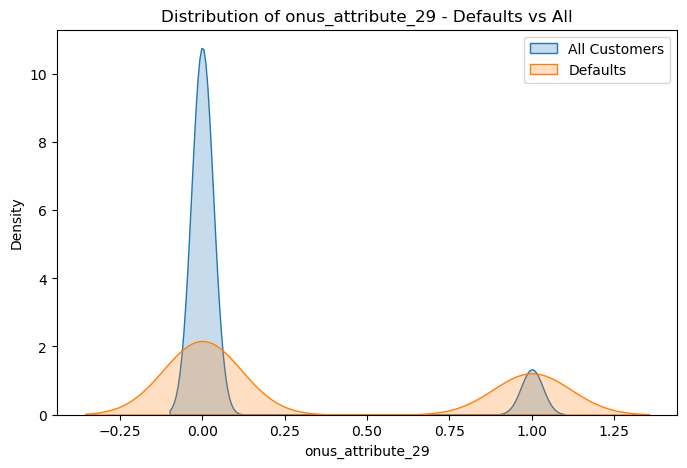

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


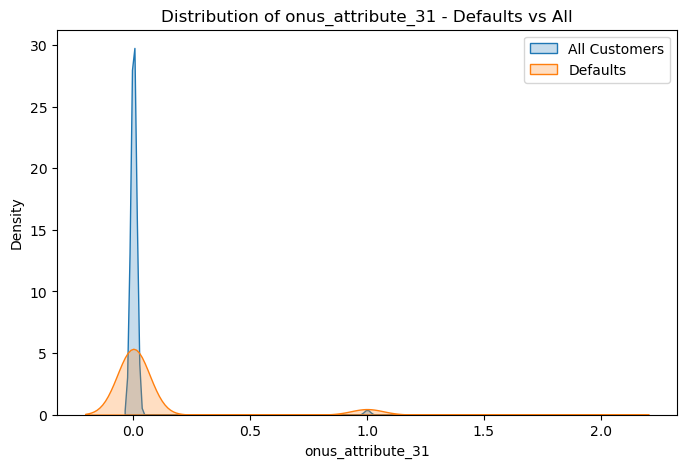

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


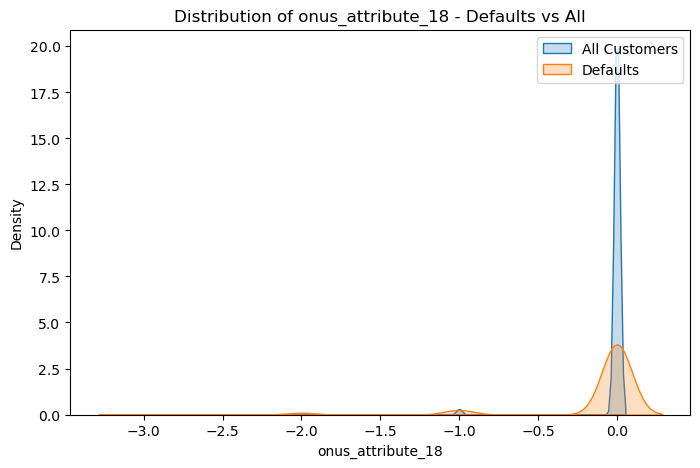

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


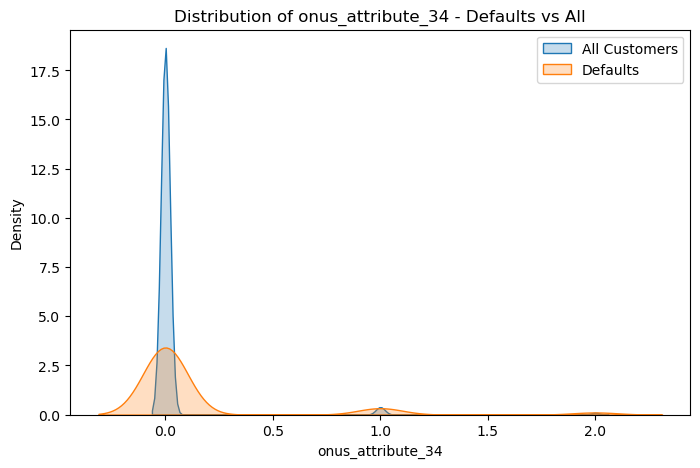

In [82]:
import seaborn as sns  
import matplotlib.pyplot as plt  
# Filter transaction attribute columns
transaction_cols = [col for col in df.columns if col.startswith('onus')]

# Plot each attribute
for col in transaction_cols:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[col], label='All Customers', shade=True)  
    sns.kdeplot(defaults[col], label='Defaults', shade=True)  
    plt.legend()
    plt.title(f"Distribution of {col} - Defaults vs All")
    plt.show()

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


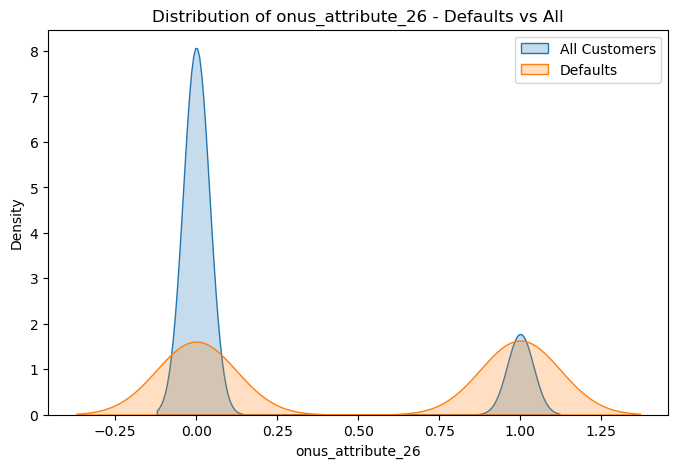

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


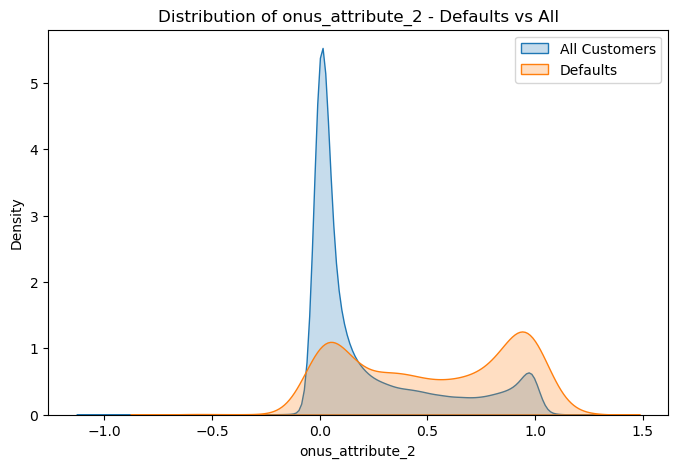

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


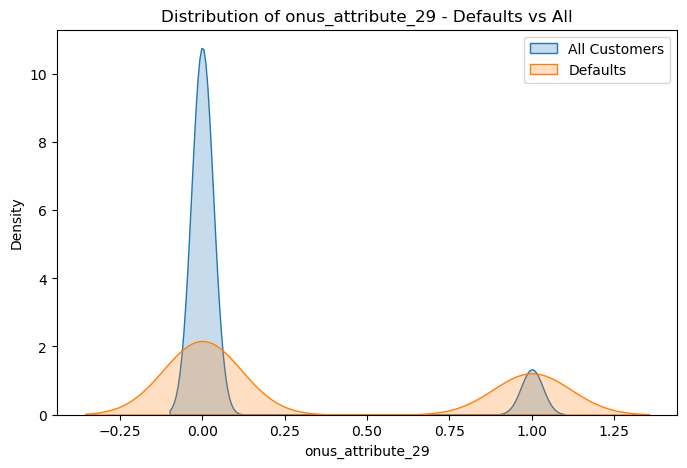

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


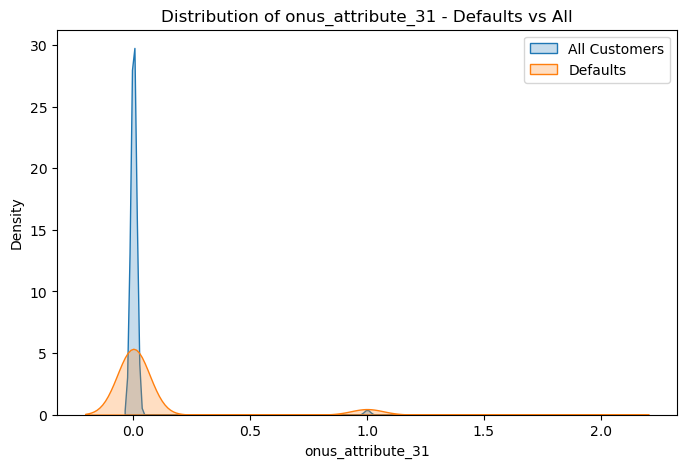

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


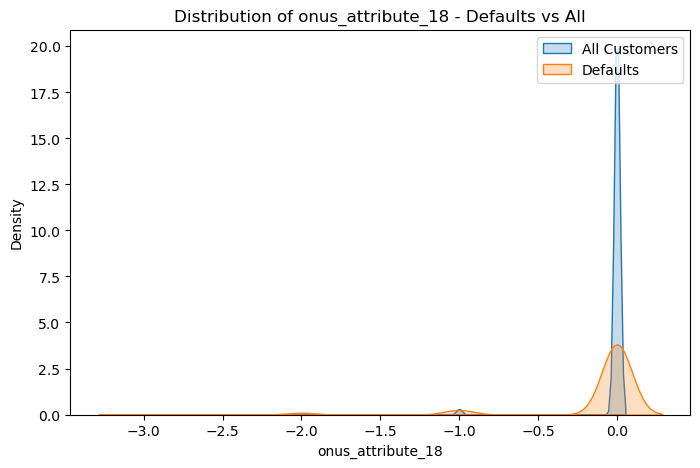

C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='All Customers', shade=True)
C:\Users\jaanh\AppData\Local\Temp\ipykernel_22464\2113150472.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defaults[col], label='Defaults', shade=True)


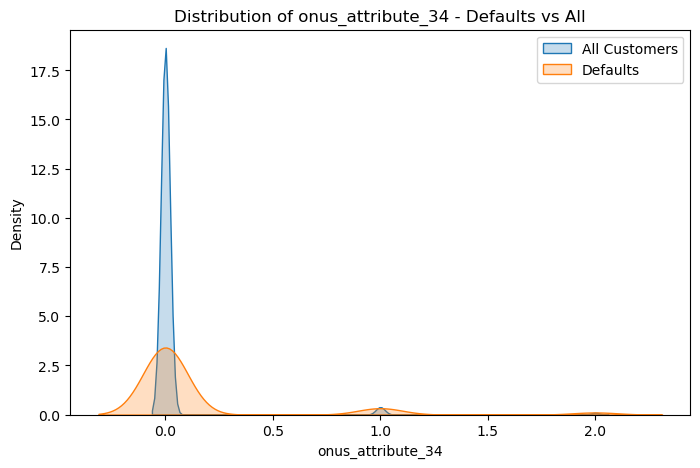

In [82]:
import seaborn as sns  
import matplotlib.pyplot as plt  
# Filter transaction attribute columns
transaction_cols = [col for col in df.columns if col.startswith('onus')]

# Plot each attribute
for col in transaction_cols:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[col], label='All Customers', shade=True)  
    sns.kdeplot(defaults[col], label='Defaults', shade=True)  
    plt.legend()
    plt.title(f"Distribution of {col} - Defaults vs All")
    plt.show()